# Business Understanding

## Business problem:
### Most NBA sports algorithms try to predict winning each individual game instead of looking at the season as a whole. Algorithms only take into account features such as Points Allowed, Points For, Shooting percentage, Turnovers and Rebounds from the last 10 games or so. I must dig deeper and find out the best model to predict highest overall season wins and pull out the principal components that are highley correlated to most wins using the first half of the 2022 season stats. 

### Stakeholder: NBA Team Analyst or Scout hired by lower rank team to figure out the best way to increase wins per NBA 2022 season based on 27 features. I must help them predict the best draft picks along with what potential trades could make for a better winning outcome for the over all season. 

# Data Understanding: 
### I will be using data in the form of csv files from the site https://www.sports-reference.com/. I am using the teams data on 27 features/variables: 25 Continous, 1 categorical (team name), 1 binary (total wins). 

### Data gathering
#### (URL and how to get csv/data) Reproducable*

### Data Preparation
#### Step 1: Data consists of 2 separate data frames. data frame one contains 24 features. 1 categorical column (Team Name). Data frame 2 contains information that should be dropped. Drop: first row of int., player, position, nationality, and college. 
#### Step 2: create columns with list values with each teams Average weight, height, age, and experience.
#### Step 3: Concatinate both data frames so that the features are all condensed for modeling
#### Step 4: create new collumn with team wins for target value.

## 

In [1]:
#Scroll bar shows entire data frame
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge

In [3]:
! pwd

/c/Users/jharper503/Documents/Flatiron/phase 5/NBA_Season_Wins


In [4]:
! ls data

NBA_1986_season.csv
NBA_1987_season.csv
NBA_1988_season.csv
NBA_1989_season.csv
NBA_1990_season.csv
NBA_1991_season.csv
NBA_1992_season.csv
NBA_1993_season.csv
NBA_1994_season.csv
NBA_1995_season.csv
NBA_1996_season.csv
NBA_1997_season.csv
NBA_1998_season.csv
NBA_1999_season.csv
NBA_2000_season.csv
NBA_2001_season.csv
NBA_2002_season.csv
NBA_2003_season.csv
NBA_2004_season.csv
NBA_2005_season.csv
NBA_2006_season.csv
NBA_2007_season.csv
NBA_2008_season.csv
NBA_2009_season.csv
NBA_2010_season.csv
NBA_2011_season.csv
NBA_2012_season.csv
NBA_2013_season.csv
NBA_2014_season.csv
NBA_2015_season.csv
NBA_2016_season.csv
NBA_2017_season.csv
NBA_2018_season.csv
NBA_2019_season.csv
NBA_2020_season.csv
NBA_2021_season.csv
NBA_2022_season.csv


In [5]:
df1986 = pd.read_csv('data/NBA_1986_season.csv')

In [6]:
df1987 = pd.read_csv('data/NBA_1987_season.csv')

In [7]:
df1987.shape

(24, 25)

In [8]:
import pandas as pd
import glob

path = './data' # use your path
all_files = glob.glob(path + "/*.csv")
print(all_files)
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

['./data\\NBA_1986_season.csv', './data\\NBA_1987_season.csv', './data\\NBA_1988_season.csv', './data\\NBA_1989_season.csv', './data\\NBA_1990_season.csv', './data\\NBA_1991_season.csv', './data\\NBA_1992_season.csv', './data\\NBA_1993_season.csv', './data\\NBA_1994_season.csv', './data\\NBA_1995_season.csv', './data\\NBA_1996_season.csv', './data\\NBA_1997_season.csv', './data\\NBA_1998_season.csv', './data\\NBA_1999_season.csv', './data\\NBA_2000_season.csv', './data\\NBA_2001_season.csv', './data\\NBA_2002_season.csv', './data\\NBA_2003_season.csv', './data\\NBA_2004_season.csv', './data\\NBA_2005_season.csv', './data\\NBA_2006_season.csv', './data\\NBA_2007_season.csv', './data\\NBA_2008_season.csv', './data\\NBA_2009_season.csv', './data\\NBA_2010_season.csv', './data\\NBA_2011_season.csv', './data\\NBA_2012_season.csv', './data\\NBA_2013_season.csv', './data\\NBA_2014_season.csv', './data\\NBA_2015_season.csv', './data\\NBA_2016_season.csv', './data\\NBA_2017_season.csv', './data

In [9]:
# Original frame
frame.shape

(1094, 25)

In [10]:
#Concat all 35 data frames using BLob function in pandas
pd.concat([df1986, df1987], ignore_index=False)

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Los Angeles Lakers*,82,241.8,46.8,89.5,0.522,1.7,5.0,0.337,45.1,84.6,0.533,22.1,28.4,0.778,13.4,31.2,44.6,29.7,8.5,5.1,17.9,24.8,117.3
1,2.0,Dallas Mavericks*,82,241.5,44.3,88.5,0.501,1.7,5.4,0.316,42.6,83.0,0.513,25.0,32.2,0.776,12.9,29.9,42.8,25.7,7.4,4.5,15.7,21.1,115.3
2,3.0,Portland Trail Blazers*,82,242.1,44.0,88.8,0.496,0.9,3.4,0.269,43.1,85.4,0.505,26.1,34.1,0.765,14.1,28.2,42.3,26.6,10.5,4.3,18.6,26.9,115.1
3,4.0,Denver Nuggets*,82,240.9,45.2,96.0,0.471,0.9,3.7,0.233,44.3,92.2,0.480,23.5,29.5,0.798,14.9,28.3,43.2,26.1,10.1,5.1,16.3,26.4,114.8
4,5.0,Milwaukee Bucks*,82,241.5,43.9,89.1,0.493,1.5,4.7,0.327,42.4,84.5,0.502,25.2,32.9,0.764,14.5,29.5,44.0,26.3,9.8,5.6,16.7,27.0,114.5
5,6.0,Houston Rockets*,82,240.9,45.8,93.5,0.490,1.0,3.8,0.274,44.8,89.8,0.499,21.7,29.7,0.730,16.0,29.7,45.7,28.3,9.1,6.7,16.8,24.3,114.4
6,7.0,Detroit Pistons*,82,241.2,45.8,94.5,0.484,0.7,2.2,0.302,45.1,92.3,0.489,22.0,28.0,0.783,15.6,30.0,45.6,28.3,9.0,4.1,16.4,25.6,114.2
7,8.0,Boston Celtics*,82,242.1,45.3,89.2,0.508,1.7,4.8,0.351,43.7,84.4,0.517,21.8,27.4,0.794,12.9,33.6,46.4,29.1,7.8,6.2,16.6,21.4,114.1
8,9.0,Golden State Warriors,82,241.2,44.5,92.3,0.482,1.1,3.4,0.313,43.5,88.9,0.489,23.3,30.7,0.760,15.5,28.6,44.1,24.6,9.2,4.3,17.1,24.8,113.4
9,10.0,San Antonio Spurs*,82,241.5,43.9,86.6,0.506,0.6,2.4,0.235,43.3,84.2,0.514,23.0,30.8,0.746,13.0,29.4,42.5,27.6,9.8,4.8,19.8,25.8,111.2


In [11]:
# Checkin for NaN values
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      1057 non-null   float64
 1   Team    1094 non-null   object 
 2   G       1094 non-null   int64  
 3   MP      1094 non-null   float64
 4   FG      1094 non-null   float64
 5   FGA     1094 non-null   float64
 6   FG%     1094 non-null   float64
 7   3P      1094 non-null   float64
 8   3PA     1094 non-null   float64
 9   3P%     1094 non-null   float64
 10  2P      1094 non-null   float64
 11  2PA     1094 non-null   float64
 12  2P%     1094 non-null   float64
 13  FT      1094 non-null   float64
 14  FTA     1094 non-null   float64
 15  FT%     1094 non-null   float64
 16  ORB     1094 non-null   float64
 17  DRB     1094 non-null   float64
 18  TRB     1094 non-null   float64
 19  AST     1094 non-null   float64
 20  STL     1094 non-null   float64
 21  BLK     1094 non-null   float64
 22  

In [12]:
#dropped all columns with null values
frame.dropna(inplace=True)

In [13]:
frame.shape

(1057, 25)

In [14]:
frame.describe()
# Need to change Rk  to int data from ordinal 

,Rk,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000
mean,14.859035,79.460738,241.702176,38.315989,83.516746,0.458551,6.132640,17.341722,0.345306,32.186471,66.174267,0.487512,18.987417,25.132734,0.756069,11.959319,30.748912,42.705203,22.836518,7.927909,5.010974,15.050142,21.721192,101.753264
std,8.364676,6.957706,0.859916,2.884326,4.426377,0.019126,3.302683,8.918630,0.032627,4.373536,9.316741,0.025422,2.435455,3.179234,0.030073,1.895387,2.391118,2.142053,2.464473,1.031698,0.899480,1.494517,2.106656,7.034200
min,1.000000,50.000000,240.000000,30.800000,71.200000,0.401000,0.300000,1.600000,0.161000,23.100000,41.900000,0.421000,12.200000,16.600000,0.660000,7.600000,24.900000,35.600000,15.600000,5.500000,2.400000,11.100000,16.600000,81.900000
25%,8.000000,82.000000,241.200000,36.200000,80.300000,0.445000,3.800000,11.100000,0.333000,29.300000,60.200000,0.470000,17.200000,22.800000,0.738000,10.600000,29.100000,41.200000,21.000000,7.200000,4.400000,14.000000,20.200000,96.600000
50%,15.000000,82.000000,241.500000,38.100000,83.300000,0.458000,5.800000,16.300000,0.351000,31.000000,64.600000,0.486000,18.700000,24.900000,0.757000,11.800000,30.400000,42.700000,22.500000,7.800000,4.900000,14.900000,21.600000,101.100000
75%,22.000000,82.000000,242.100000,40.400000,86.800000,0.471000,8.000000,22.300000,0.365000,33.600000,70.600000,0.503000,20.400000,27.300000,0.777000,13.100000,32.200000,44.200000,24.500000,8.600000,5.500000,16.000000,23.000000,106.600000
max,30.000000,82.000000,244.900000,47.600000,108.100000,0.522000,16.700000,45.400000,0.428000,45.100000,95.200000,0.571000,28.200000,35.700000,0.839000,18.500000,42.200000,51.700000,30.400000,12.800000,8.700000,21.500000,29.000000,120.100000


In [15]:
#import the libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
import plotly.express as px

<AxesSubplot:>

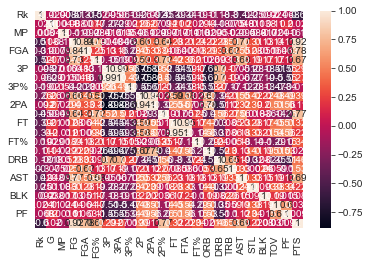

In [16]:
#plotting a heatmap to check for coorelations.
import seaborn as sn
# generating pairwise correlation
corr = frame.corr()
sn.heatmap(corr, annot = True)

In [17]:
frame['Rk'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
        ... 
1088    26.0
1089    27.0
1090    28.0
1091    29.0
1092    30.0
Name: Rk, Length: 1057, dtype: float64>

For aesthetic reasons I wanted to move the X -axis labels to the top. I googled "sn.heatmap move x axis labels to top" and found [this resource](https://stackoverflow.com/questions/51759859/how-to-move-labels-from-bottom-to-top-without-adding-ticks).

Additionally I wanted to make visual larger and google "sn.heatmap making size larger" and found [This source](https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn).

#### Visuals such as heatmap (show multicolinearity), Hist and bar graphs comparing features to target (total 2022 wins)

<AxesSubplot:>

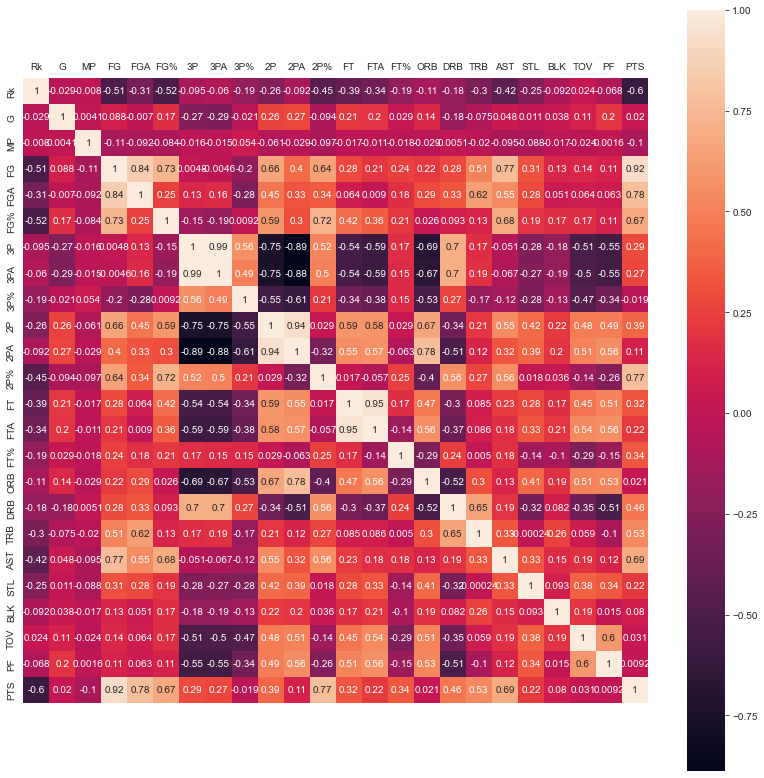

In [18]:
# This adjust figure size
plt.figure(figsize = (14,14))

# This moves X axis labels to the top
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

# This code generates visual
corr = frame.corr()
sn.heatmap(corr, square=True, annot = True)



#ax = sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5)

<AxesSubplot:xlabel='PTS', ylabel='Rk'>

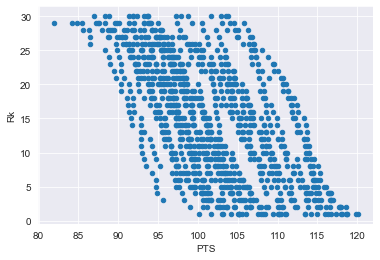

In [82]:
frame.plot.scatter('PTS','Rk')

<AxesSubplot:xlabel='TRB', ylabel='Rk'>

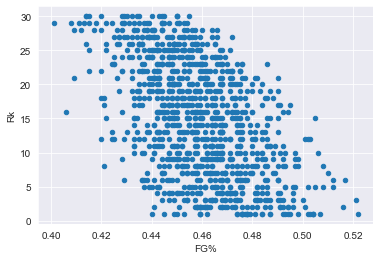

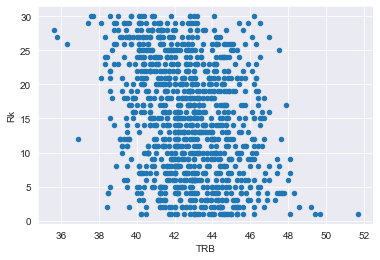

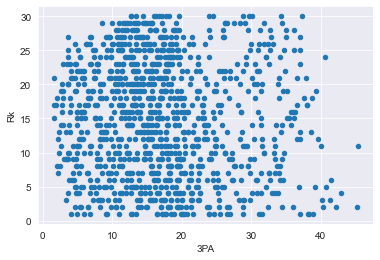

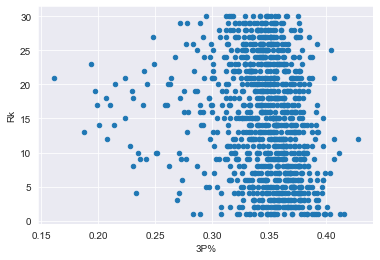

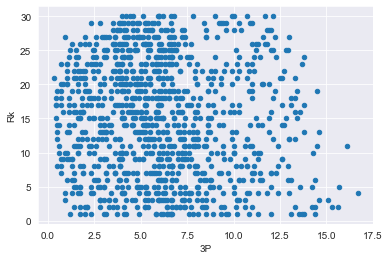

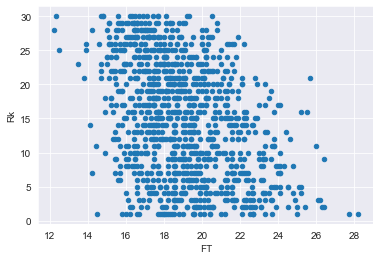

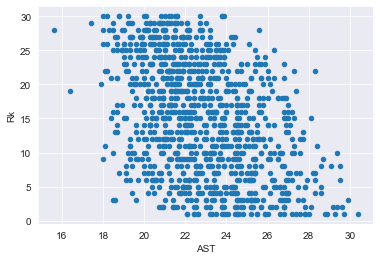

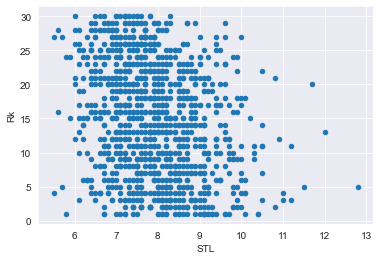

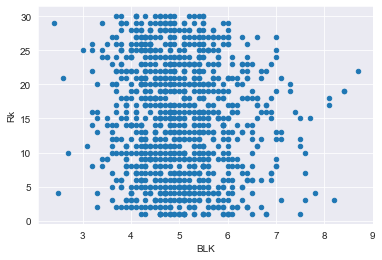

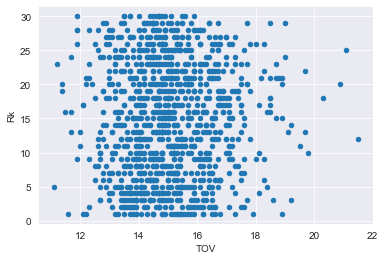

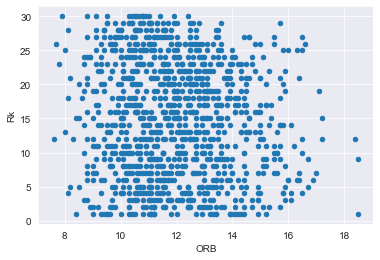

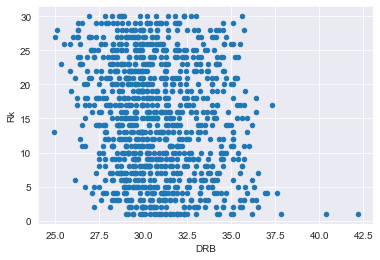

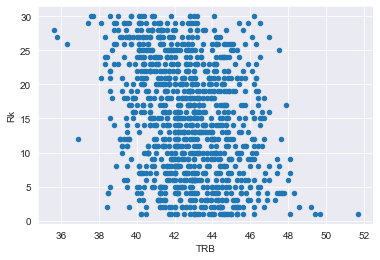

In [20]:
#Do scatter plot with features and targets to also show multicolinearity
frame.plot.scatter('FG%','Rk')
frame.plot.scatter('TRB','Rk')
frame.plot.scatter('3PA','Rk') #DOESNT CORR
frame.plot.scatter('3P%','Rk') #DOESNT CORR
frame.plot.scatter('3P','Rk') # DC
frame.plot.scatter('FT','Rk')
frame.plot.scatter('AST','Rk')
frame.plot.scatter('STL','Rk')
frame.plot.scatter('BLK','Rk') 
frame.plot.scatter('TOV','Rk') 
frame.plot.scatter('ORB','Rk')
frame.plot.scatter('DRB','Rk')
frame.plot.scatter('TRB','Rk')

In [21]:
! pip lin_reg import best_line

ERROR: unknown command "lin_reg"



In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm

import sys
import os
module_path = os.path.abspath(os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)
#from lin_reg import best_line

%matplotlib inline

## Modeling 

### LR model: Run train, test split with entire data set for features as X value, as for the Y value being the target value (Wins). 

In [23]:
endog = frame['Rk']
exog = sm.add_constant(frame['PTS'])
lin_reg_model = sm.OLS(endog, exog)

C:\Users\jharper503\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [24]:
lin_reg_model.fit()

In [25]:
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Rk   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     581.7
Date:                Thu, 03 Mar 2022   Prob (F-statistic):          1.01e-102
Time:                        09:56:46   Log-Likelihood:                -3512.3
No. Observations:                1057   AIC:                             7029.
Df Residuals:                    1055   BIC:                             7039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.9961      2.998     29.018      0.000      81.113      92.879
PTS           -0.7089      0.029    -24.119      0.000      -0.767      -0.651
==============================================================================
Omnibus:                       29.060   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.903
Skew:                           0.050   Prob(JB):                     0.000581
Kurtosis:                       2.427   Cond. No.                     1.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multiple linear Regression (PTS AND PF)

In [83]:
X1 = frame[['PTS', 'PF']]
y1 = frame['Rk']

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [85]:
MR_model = sm.OLS(endog=y, exog=X).fit()

In [86]:
MR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.332
Model:                            OLS   Adj. R-squared (uncentered):              0.330
Method:                 Least Squares   F-statistic:                              124.0
Date:                Thu, 03 Mar 2022   Prob (F-statistic):                    6.53e-86
Time:                        10:39:48   Log-Likelihood:                         -866.28
No. Observations:                1000   AIC:                                      1741.
Df Residuals:                     996   BIC:                                      1760.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0050      0.014      0.365      0.715      -0.022       0.032
x2             0.3422      0.015     22.135      0.000       0.312       0.373
x3            -0.0292      0.018     -1.590      0.112      -0.065       0.007
x4            -0.0164      0.019     -0.885      0.376      -0.053       0.020
==============================================================================
Omnibus:                       23.506   Durbin-Watson:                   0.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.004
Skew:                           0.020   Prob(JB):                     2.29e-11
Kurtosis:                       4.084   Cond. No.                         1.37
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
frame.head()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Los Angeles Lakers*,82,241.8,46.8,89.5,0.522,1.7,5.0,0.337,45.1,84.6,0.533,22.1,28.4,0.778,13.4,31.2,44.6,29.7,8.5,5.1,17.9,24.8,117.3
1,2.0,Dallas Mavericks*,82,241.5,44.3,88.5,0.501,1.7,5.4,0.316,42.6,83.0,0.513,25.0,32.2,0.776,12.9,29.9,42.8,25.7,7.4,4.5,15.7,21.1,115.3
2,3.0,Portland Trail Blazers*,82,242.1,44.0,88.8,0.496,0.9,3.4,0.269,43.1,85.4,0.505,26.1,34.1,0.765,14.1,28.2,42.3,26.6,10.5,4.3,18.6,26.9,115.1
3,4.0,Denver Nuggets*,82,240.9,45.2,96.0,0.471,0.9,3.7,0.233,44.3,92.2,0.480,23.5,29.5,0.798,14.9,28.3,43.2,26.1,10.1,5.1,16.3,26.4,114.8
4,5.0,Milwaukee Bucks*,82,241.5,43.9,89.1,0.493,1.5,4.7,0.327,42.4,84.5,0.502,25.2,32.9,0.764,14.5,29.5,44.0,26.3,9.8,5.6,16.7,27.0,114.5


### Multiple linear Regression

In [87]:
X = frame.drop(['Rk','Team', 'MP', 'G', 'FG', '3P', '2P', '3PA', '2PA', 'TRB'], axis=1)
y = frame['Rk']

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [89]:
MR_model = sm.OLS(endog=y, exog=X).fit()

In [90]:
MR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     Rk   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              585.2
Date:                Thu, 03 Mar 2022   Prob (F-statistic):                        0.00
Time:                        10:40:10   Log-Likelihood:                         -3312.1
No. Observations:                1057   AIC:                                      6654.
Df Residuals:                    1042   BIC:                                      6729.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FGA            1.7302      0.204      8.493      0.000       1.330       2.130
FG%          -24.4008     21.236     -1.149      0.251     -66.071      17.269
3P%          -36.5593      8.769     -4.169      0.000     -53.766     -19.353
2P%          187.7582     30.149      6.228      0.000     128.598     246.918
FT            -0.0887      1.051     -0.084      0.933      -2.151       1.974
FTA            0.3811      0.685      0.557      0.578      -0.963       1.725
FT%           29.9185     21.924      1.365      0.173     -13.102      72.939
ORB           -1.3014      0.188     -6.929      0.000      -1.670      -0.933
DRB           -0.4625      0.133     -3.475      0.001      -0.724      -0.201
AST           -0.1489      0.117     -1.271      0.204      -0.379       0.081
STL           -1.5955      0.212     -7.524      0.000      -2.012      -1.179
BLK            0.0365      0.211      0.173      0.863      -0.378       0.451
TOV            1.1003      0.168      6.545      0.000       0.770       1.430
PF            -0.0420      0.122     -0.343      0.731      -0.282       0.198
PTS           -1.9447      0.193    -10.051      0.000      -2.324      -1.565
==============================================================================
Omnibus:                       14.447   Durbin-Watson:                   0.691
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.914
Skew:                          -0.104   Prob(JB):                      0.00703
Kurtosis:                       2.573   Cond. No.                     2.96e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.utils import resample
from sklearn.datasets import load_breast_cancer, load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report

### Hand picked LR (Test set features: added average teams height, weight, age, and experience And drop features that are highley multicolinear). 

In [68]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                   random_state=1)
# Scale the data for modeling
cred_scaler = StandardScaler()
cred_scaler.fit(X_train)
X_train_sc = cred_scaler.transform(X_train)
X_test_sc = cred_scaler.transform(X_test)

# Train a logistic regresssion model with the train data
cred_model = LogisticRegression(random_state=42)
cred_model.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

In [69]:
cred_model.score(X_test_sc, y_test)

0.07169811320754717

C:\Users\jharper503\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


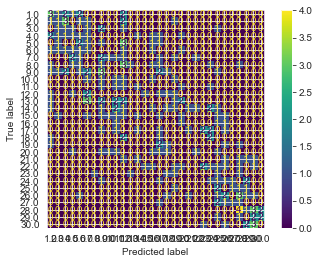

In [70]:
# More visual representation
plot_confusion_matrix(cred_model, X_test_sc, y_test);

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
RandomForestClassifier(...)
print(clf.predict([[0, 0, 0, 0]]))

[1]


In [72]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_test, y_test)

RandomForestClassifier(random_state=42)

In [73]:
rf.score(X_test, y_test)

1.0

## Evaluate Models 
### Using Accuracy and precision on each model and then looking at which model did the best. Using the best fitted model I will evaluate the principal components within that model and use it to tell what features are the most important to winning the most games in an NBA season. Also decide which type of players to draft and/or trade for the best odds of winning. 

In [74]:
#validation score
rf.score(X_test, y_test)
rf_yhat = rf.predict(X_test)
print('Precision Score:', precision_score(y_test, rf_yhat, pos_label='positive', average='micro'))
print('Accuracy Score:', accuracy_score(y_test, rf_yhat))

Precision Score: 1.0
Accuracy Score: 1.0


C:\Users\jharper503\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


### Do that with MNB and RF classifiers on both data sets (train and test).

In [78]:
import xgboost as xgb
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.utils import resample
from sklearn.datasets import load_breast_cancer, load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import pipeline

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, get_scorer, f1_score,roc_auc_score,precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.cluster import KMeans

To determine the best k I used [this resource](https://github.com/flatiron-school/ds-clustering-gfc33/blob/main/notebooks/kmeans_clustering.ipynb) for code

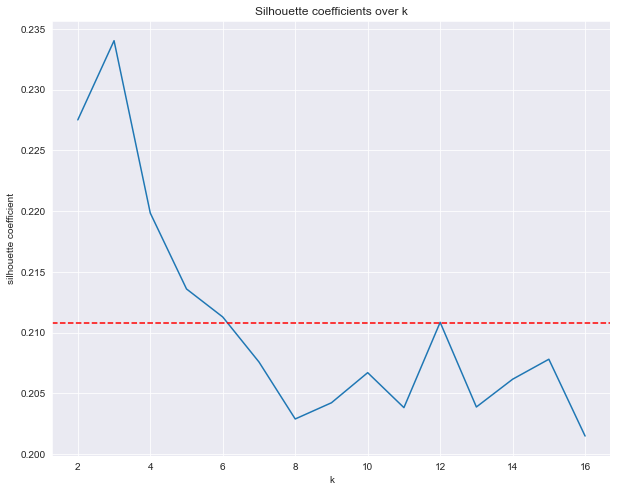

In [79]:
# Generate silhouette coefficient for each k
silhouette_plot = []
for k in range(2, 17):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)
    
    
# Plot Silhouette coefficient
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Silhouette coefficients over k')
ax.set_xlabel('k')
ax.set_ylabel('silhouette coefficient')
ax.plot(range(2, 17), silhouette_plot)
ax.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
ax.grid(True)

In [80]:
## building different models
def model_building(model_name):
  model = model_name
  model.fit(X_train, y_train)
  print(f"******** Model :- {model_name} ********\n\n")
  print(f"******** Score :- {model.score(X_test, y_test)} ***********")
  print(f"******** Classification Report ************************\n\n")
  y_prediction = model.predict(X_test)
  print(classification_report(y_test, y_prediction))

## dictionary with different models
model_dict = {'dt':DecisionTreeClassifier(criterion='entropy'), 
              'knn':KNeighborsClassifier(n_neighbors=3), 
              'rf': RandomForestClassifier(), 
              'xgb':xgb.XGBClassifier(random_state=42, learning_rate=0.4)}


## calling to build and evaluate models
for key in model_dict.keys():
  model_building(model_dict[key])

******** Model :- DecisionTreeClassifier(criterion='entropy') ********


******** Score :- 0.07169811320754717 ***********
******** Classification Report ************************


              precision    recall  f1-score   support

         1.0       0.17      0.09      0.12        11
         2.0       0.15      0.20      0.17        10
         3.0       0.00      0.00      0.00         8
         4.0       0.08      0.09      0.08        11
         5.0       0.12      0.20      0.15        10
         6.0       0.12      0.11      0.12         9
         7.0       0.17      0.09      0.12        11
         8.0       0.14      0.08      0.11        12
         9.0       0.00      0.00      0.00        14
        10.0       0.00      0.00      0.00         6
        11.0       0.00      0.00      0.00         6
        12.0       0.00      0.00      0.00         8
        13.0       0.20      0.08      0.11        13
        14.0       0.12      0.08      0.10        13
        

C:\Users\jharper503\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jharper503\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jharper503\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


******** Model :- RandomForestClassifier() ********


******** Score :- 0.04905660377358491 ***********
******** Classification Report ************************


              precision    recall  f1-score   support

         1.0       0.17      0.18      0.17        11
         2.0       0.06      0.10      0.08        10
         3.0       0.08      0.12      0.10         8
         4.0       0.08      0.09      0.09        11
         5.0       0.00      0.00      0.00        10
         6.0       0.08      0.11      0.09         9
         7.0       0.10      0.09      0.10        11
         8.0       0.00      0.00      0.00        12
         9.0       0.00      0.00      0.00        14
        10.0       0.00      0.00      0.00         6
        11.0       0.00      0.00      0.00         6
        12.0       0.25      0.12      0.17         8
        13.0       0.12      0.08      0.10        13
        14.0       0.00      0.00      0.00        13
        15.0       0.00    

C:\Users\jharper503\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


******** Model :- XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None) ********


******** Score :- 0.07547169811320754 ***********
******** Classification Report ************************


              precision    recall  f1-score   support

         1.0       0.33      0.18      0.24        11
         2.0       0.11      0.20      0.14        10
         3.0       0.09 

In [41]:
#extract important features from top performing model and put in DF
rf_feat_iter = {name: score
 for name, score
 in zip(X_test.columns, rf.feature_importances_)
}
rf_feat_iter = pd.DataFrame(data=rf_feat_iter, index=range(len(rf_feat_iter)))
rf_feat_iter.head()


,FGA,FG%,3P%,2P%,FT,FTA,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,0.064855,0.068567,0.064839,0.070032,0.072664,0.066848,0.068465,0.065869,0.073176,0.063129,0.066666,0.057447,0.057973,0.060661,0.078808
1,0.064855,0.068567,0.064839,0.070032,0.072664,0.066848,0.068465,0.065869,0.073176,0.063129,0.066666,0.057447,0.057973,0.060661,0.078808
2,0.064855,0.068567,0.064839,0.070032,0.072664,0.066848,0.068465,0.065869,0.073176,0.063129,0.066666,0.057447,0.057973,0.060661,0.078808
3,0.064855,0.068567,0.064839,0.070032,0.072664,0.066848,0.068465,0.065869,0.073176,0.063129,0.066666,0.057447,0.057973,0.060661,0.078808
4,0.064855,0.068567,0.064839,0.070032,0.072664,0.066848,0.068465,0.065869,0.073176,0.063129,0.066666,0.057447,0.057973,0.060661,0.078808


In [42]:
#drop duplicates and transpose view for readability
rf_feat_iter.drop_duplicates(inplace=True)
rf_feat_iter = rf_feat_iter.T
rf_feat_iter


,0
FGA,0.064855
FG%,0.068567
3P%,0.064839
2P%,0.070032
FT,0.072664
FTA,0.066848
FT%,0.068465
ORB,0.065869
DRB,0.073176
AST,0.063129


In [43]:
#top ten features in feature importances
rf_feat_iter.rename(columns = {0: 'Best_Feature'}, inplace = True)
rf_feat_iter.sort_values(by='Best_Feature', ascending=False, inplace=True)
rf_feat_iter.head(15)


,Best_Feature
PTS,0.078808
DRB,0.073176
FT,0.072664
2P%,0.070032
FG%,0.068567
FT%,0.068465
FTA,0.066848
STL,0.066666
ORB,0.065869
FGA,0.064855
